## How well do jobs and skills pay for Data Analysts?
-----

## Import Libraries and Data

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## Salary Distribution by Job Title

Filter data to only include salary values from India.

In [2]:
# filter for the job titles and country
df_India = df[(df['job_country'] == 'India')].dropna(subset=['salary_year_avg'])

Create a list of the main job_titles in my dataset and filter my dataframe to only contain these job titles.

In [3]:
job_titles = df_India['job_title_short'].value_counts().index[:6].tolist()

# filter the df for the top 6 job titles
df_India_top6 = df_India[df_India['job_title_short'].isin(job_titles)]

# order the job titles by median salary
job_order = df_India_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

job_titles


['Data Engineer',
 'Data Analyst',
 'Data Scientist',
 'Machine Learning Engineer',
 'Senior Data Engineer',
 'Software Engineer']

## Plot Salary Distributions

Plot the top 6 job titles salary distributions using a box plot.

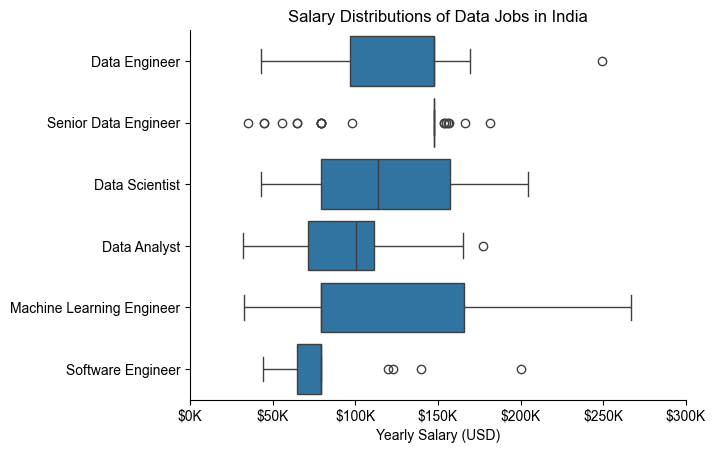

In [4]:
sns.boxplot(data=df_India_top6, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')
sns.despine()

# this is all the same
plt.title('Salary Distributions of Data Jobs in India')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 300000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

## Investigate Median Salary Vs Skill for Data Analysts

Filters the original dataset to only get rows where the job title is 'Data Analyst' and the country is 'India', to create a new DataFrame df_DA_India. Drop NaN values from the 'salary_year_avg' column. Then it uses the explode method on the job_skills column to create a new row in the DataFrame for each skill associated with a job. Finally, it displays the first five entries of the salary_year_avg and job_skills columns.

In [5]:
# Only get data analyst jobs in India
df_DA_India = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'India')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_India = df_DA_India.dropna(subset=['salary_year_avg'])

df_DA_India = df_DA_India.explode('job_skills')

df_DA_India[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
11412,50400.0,python
11412,50400.0,sql
11412,50400.0,aws
11412,50400.0,azure
11412,50400.0,excel


## Determine The Highest Paid Skills and Most Demanded Skills

Gets the top ten highest-paying skills for Data Analysts by calculating the median salary for each skill listed in the df_DA_India. It groups the data by job skills, computes the median salary, sorts these values in descending order by median, and then selects the top 15. This is then formatted into a new DataFrame (df_DA_top_pay) with a reset index and a renamed salary column labeled 'median_salary'.

In [6]:
df_DA_top_pay = df_DA_India.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

df_DA_top_pay = df_DA_top_pay.head(15)

df_DA_top_pay

,count,median
job_skills,,
pyspark,1,165000.0
linux,1,165000.0
gitlab,1,165000.0
mysql,1,165000.0
postgresql,1,165000.0
mongodb,6,163782.0
gdpr,2,163782.0
neo4j,1,163782.0
databricks,3,163782.0


Calculates the count and median salary for each skill in df_DA_India. It groups the data by job_skills, aggregates it to find the count and median salary for each skill, and then sorts the results by count in descending order by count. It re-sorts this subset by median salary in descending order.

In [7]:
df_DA_skills = df_DA_India.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.head(15).sort_values(by='median', ascending=False)

df_DA_skills

,count,median
job_skills,,
mongodb,6,163782.00
looker,10,111175.00
power bi,17,111175.00
spark,11,111175.00
powerpoint,10,111175.00
tableau,20,108087.50
flow,6,102750.00
excel,39,98500.00
python,36,96050.00


Creates two horizontal bar charts:

1. Displays the highest paid skills
2. Shows the most in demand skills

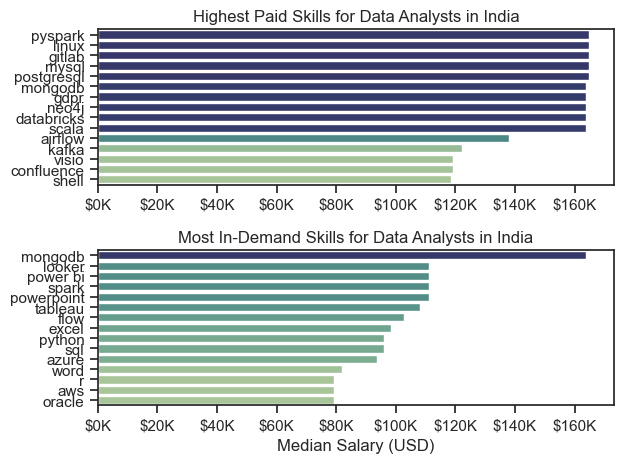

In [8]:
fig, ax = plt.subplots(2, 1)  

# Top 15 Highest Paid Skills for Data Analysts
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, hue='median', ax=ax[0], palette='crest')
ax[0].legend().remove()
ax[0].set_title('Highest Paid Skills for Data Analysts in India')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


# Top 15 Most In-Demand Skills for Data Analysts')
sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, hue='median', ax=ax[1], palette='crest')
ax[1].legend().remove()
ax[1].set_title('Most In-Demand Skills for Data Analysts in India')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

sns.set_theme(style='ticks')
plt.tight_layout()
plt.show()